# Project: Facial emotion recognition
# MTH767P - Group 4

In [1]:
%load_ext autoreload
%autoreload 2

In [126]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

from utils import EmotionsDataset

## Data loading and pre-processing 

#### Read data

In [127]:
# define dictionary for emotions
emotion_dict = {0: 'Angry', 
                1: 'Disgust', 
                2: 'Fear',
                3: 'Happy', 
                4: 'Sad',
                5: 'Surprise',
                6: 'Neutral'}

In [128]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
batch_size = 4
dataset = EmotionsDataset(root='./data', fname='icml_face_data.csv', transform=transform)

#### Visualize data


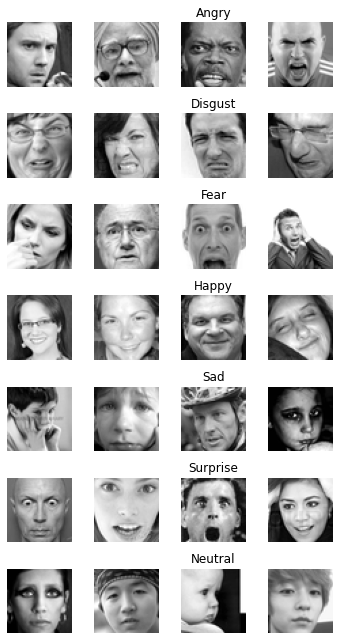

In [129]:
# generate sample of images
fig, ax = plt.subplots(len(emotion_dict), batch_size, figsize=(5, 9))

for i, em in emotion_dict.items():
    emotion = dataset.data[trainset.targets==i][:batch_size]
    # set title
    ax[i, 2].set_title(em)
    for j in range(emotion.shape[0]):      
        im = emotion[j]
        ax[i, j].imshow(im, cmap='gray')
        ax[i, j].axis('off')
fig.tight_layout();

### Data split

In [130]:
trainloader, testloader = dataset.split(ratio=0.8, batch_size=batch_size)

---
## Convolutional neural network setup 
### Network architecture

In [69]:
class Net(nn.Module):

    def __init__(self, layers, activation, pooling=None):
        super().__init__()
        layer_list = []
        for layer in layers:
            layer_list.append(layer.pop('ltype')(**layer))
        self.layers = nn.ModuleList(layer_list)
        self.activation = activation
        self.pool = pooling

    def forward(self, x):
        for i, layer in enumerate(self.layers):
            print(f'layer {i+1}: {layer}')
            if isinstance(self.layers[i-1], nn.Conv2d) and isinstance(layer, nn.Linear):
                print("flattening")
                x = torch.flatten(x, 1)
            x = layer(x)
            if i != len(self.layers)-1:
                print("activation")
                x = self.activation(x)
                if isinstance(layer, nn.Conv2d) and self.pool is not None:
                    print("pooling")
                    x = self.pool(x)
            print(x)
        return x

In [70]:
# Architecture
l1 = dict(ltype=nn.Conv2d, in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0, groups=1, bias=True, padding_mode='zeros')
l2 = dict(ltype=nn.Conv2d, in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0, groups=1, bias=True, padding_mode='zeros')
l3 = dict(ltype=nn.Linear, in_features=400, out_features=120, bias=True)
l4 = dict(ltype=nn.Linear, in_features=120, out_features=84, bias=True)
l5 = dict(ltype=nn.Linear, in_features=84, out_features=10, bias=True)
pooling = nn.MaxPool2d(2)
activation = F.relu
arch = {"layers": [l1,l2,l3,l4,l5], "pooling": pooling, "activation": activation}
net = Net(**arch)

### Loss function and optimizer

In [73]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

---
## Training the neural network
### Training

In [ ]:
num_epochs = 2

for epoch in range(num_epochs): 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): 
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:  
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

### Cross-validation

In [74]:
# TODO:
# - write cross-validation routine to fine tune hyperparameters

In [ ]:
# Save trained model
PATH = '.'
torch.save(net.state_dict(), PATH)

---
## Testing

In [ ]:
# Load previously trained model
net = Net(**arch)
net.load_state_dict(torch.load(PATH))

In [75]:
# TODO:
# - code prediction function
# - code routine to calculate performance metrics
# - code visualisation of results